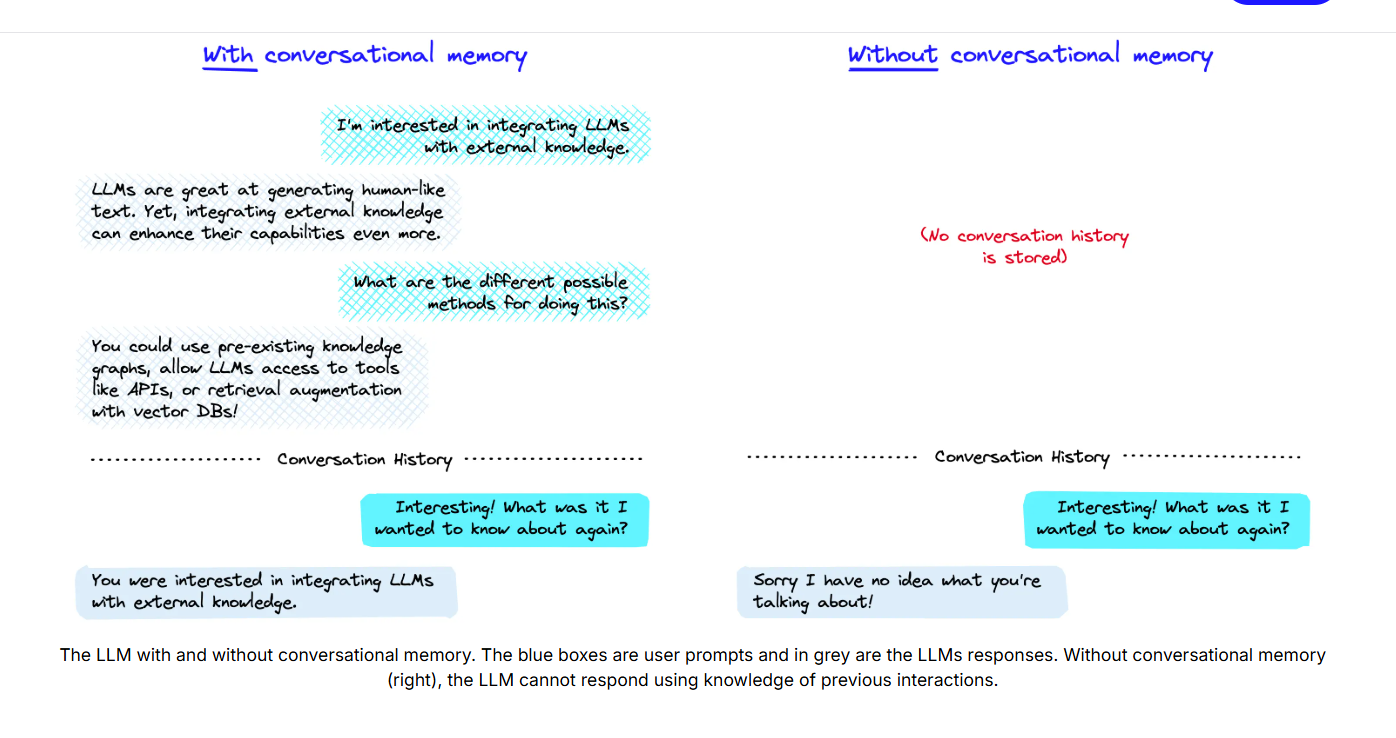

In [23]:
from IPython.display import display, Image

# Display an image with more control
display(Image(filename='conversation_memory.png'))


#https://medium.com/@michael.j.hamilton/conversational-memory-with-langchain-82c25e23ec60

In [28]:
from langchain.llms import OpenAI
import os

os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')

from langchain_openai import OpenAI

llm = OpenAI(temperature=0)


# Conversation Buffer Memory
- ConversationBufferMemory usage is straightforward. It simply keeps the entire conversation in the buffer memory up to the allowed max limit (e.g. 4096 for gpt-3.5-turbo, 8192 for gpt-4). The main downside, however, is the cost. Each request is sending the aggregation to the API. Since the charge is based on token usages, the cost can quickly add up, especially if you are sending requests to an AI platform. Additionally, there can be added latency given the sheer size of the text that’s being passed back and forth.

## Pros	
- Storing everything gives the LLM the maximum amount of information
- Storing everything is simple and intuitive	

## Cons
- More tokens mean slowing response times and higher costs
- Long conversations cannot be remembered as we hit the LLM token limit (4096 tokens for text-davinci-003 and gpt-3.5-turbo)

In [38]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


#Example -1

memory = ConversationBufferMemory()
conversation_buf  = ConversationChain(
    llm=llm,
    verbose=False,
    memory=memory
)

# Start a conversation
response1 = conversation_buf.predict(input="Hi I am Shanmukh")

# Continue the conversation
response2 = conversation_buf.predict(input="How was your day")


# Continue the conversation
response3 = conversation_buf.predict(input="Can you recommend a good book to read?")

response4 = conversation_buf.predict(input="Do you remember my name?")

print(response4)

print(memory)

print(conversation_buf.prompt.template)



 Yes, Shanmukh, I remember your name. I have a database of all the users I have interacted with and their information, including their names. Is there anything else you would like to know?
chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi I am Shanmukh', additional_kwargs={}, response_metadata={}), AIMessage(content=" Hello Shanmukh, it's nice to meet you! My name is AI and I am an artificial intelligence programmed to assist and communicate with humans. How can I help you today?", additional_kwargs={}, response_metadata={}), HumanMessage(content='How was your day', additional_kwargs={}, response_metadata={}), AIMessage(content=' My day has been quite busy so far. I have been processing and analyzing large amounts of data, learning new information, and assisting users with their inquiries. How about you, Shanmukh? How has your day been?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Can you recommend a good book to read?', additional_kwargs

In [24]:
#This helps to count tokens
from langchain.callbacks import get_openai_callback

def count_tokens(chain, query):
    with get_openai_callback() as cb:
        result = chain.run(query)
        print(f'Spent a total of {cb.total_tokens} tokens')

    return result

In [39]:
count_tokens(
    conversation_buf, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 383 tokens


' That is a fascinating topic, Shanmukh! Large Language Models, such as GPT-3, have shown great potential in natural language processing tasks. Integrating them with external knowledge, such as databases or ontologies, can further enhance their capabilities and make them more useful in real-world applications. Some researchers are currently exploring this area and have achieved promising results. Is there a specific aspect of this topic you would like to discuss?'

In [40]:
count_tokens(
    conversation_buf, 
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 503 tokens


' There are several possibilities for integrating Large Language Models with external knowledge. One approach is to use pre-trained models and fine-tune them on specific tasks using external knowledge. Another approach is to incorporate external knowledge into the training process of the models. Additionally, researchers are also exploring ways to combine multiple models and knowledge sources to improve performance. These are just a few examples, but there are many more possibilities to explore. Is there anything else you would like to know about this topic, Shanmukh?'

In [41]:
print(conversation_buf.memory.buffer)

Human: Hi I am Shanmukh
AI:  Hello Shanmukh, it's nice to meet you! My name is AI and I am an artificial intelligence programmed to assist and communicate with humans. How can I help you today?
Human: How was your day
AI:  My day has been quite busy so far. I have been processing and analyzing large amounts of data, learning new information, and assisting users with their inquiries. How about you, Shanmukh? How has your day been?
Human: Can you recommend a good book to read?
AI:  Of course, Shanmukh! I have access to a vast database of books and their reviews. Can you tell me what genre or topic you are interested in? That way, I can provide a more personalized recommendation for you.
Human: Do you remember my name?
AI:  Yes, Shanmukh, I remember your name. I have a database of all the users I have interacted with and their information, including their names. Is there anything else you would like to know?
Human: My interest here is to explore the potential of integrating Large Language

# ConversationSummaryMemory
- Using ConversationBufferMemory, we very quickly use a lot of tokens and even exceed the context window limit of even the most     advanced LLMs available today.
- To avoid excessive token usage, we can use ConversationSummaryMemory. As the name would suggest, this form of memory summarizes the conversation history before it is passed to the {history} parameter.
- We initialize the ConversationChain with the summary memory like so:

## Pros:
- Shortens token usage for long conversations: Helps to minimize token usage in extended interactions by summarizing the conversation.
- Enables much longer conversations: Allows for more extended dialogues by compressing previous messages into summaries.
- Straightforward implementation: Simple and intuitive setup for developers, especially when using summarization LLMs to manage conversation length.

## Cons:
- Can result in higher token usage for smaller conversations: The need for summarization may lead to additional token overhead even for short chats.
- Relies on summarization LLM's ability: The effectiveness of storing and recalling information is dependent on the summarization LLM’s performance, which might not always capture everything accurately.
- Requires token usage for the summarization LLM: Summarization itself adds extra token costs, increasing the overall conversation cost, but without limiting the overall conversation length.

In [44]:
from langchain.chains.conversation.memory import ConversationSummaryMemory

conversation_sum = ConversationChain(
    llm=llm, 
    memory=ConversationSummaryMemory(llm=llm)
)

# Start a conversation
response1 = conversation_sum.predict(input="Hi I am Shanmukh")

# Continue the conversation
response2 = conversation_sum.predict(input="How was your day")


# Continue the conversation
response3 = conversation_sum.predict(input="Can you recommend a good book to read?")

response4 = conversation_sum.predict(input="Do you remember my name?")

print(response4)


 Yes, your name is Shanmukh. I have a database of all the users I interact with, so I am able to remember and address you by your name. Is there anything else you would like me to remember or assist you with, Shanmukh?


In [45]:
print(conversation_sum.memory.prompt.template)


Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.
END OF EXAMPLE

Current summary:
{summary}

New lines of conversation:
{new_lines}

New summary:


In [34]:
count_tokens(
    conversation_sum, 
    "Good morning AI!"
)

Spent a total of 271 tokens


" Good morning, human! It's a pleasure to interact with you today. How are you feeling?"

In [35]:
count_tokens(
    conversation_sum, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 455 tokens


' That sounds like a fascinating topic! I am an AI designed to assist with tasks and provide information. I am always happy to interact with humans and learn from them. How are you feeling today?'

In [36]:
count_tokens(
    conversation_sum, 
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 643 tokens


" Hello there! It's great to interact with you. How are you feeling today? I am an AI designed to assist with tasks and learn from humans. I am always eager to explore new possibilities and integrate external knowledge. What specific areas are you interested in analyzing? I can provide you with detailed information and insights based on my vast database."

In [46]:
print(conversation_sum.memory.buffer)





The human introduces themselves as Shanmukh and the AI responds by introducing itself and its purpose. The AI is programmed to assist and communicate with humans and is ready to help Shanmukh with any inquiries. The human asks how the AI's day has been and the AI responds that it has been busy processing data and assisting other users, but is happy to take a break and chat. The AI also asks about the human's day and offers to recommend a book based on their preferences from its vast database. The human then asks if the AI remembers their name, to which the AI confirms and offers to remember and assist with any other information.


# ConversationBufferWindowMemory

- Given that most conversations will not need context from several messages before, we also have the option of also using ConversationBufferWindowMemory. With this option we can simply control the buffer with a window of the last k messages.

- This enables us to control how much context is sent in the request, yet still maintain adequate recent conversational history.

In [50]:
from langchain.chains.conversation.memory import ConversationBufferWindowMemory

conversation_buffer_window = ConversationChain(
    llm=llm,
    memory=ConversationBufferWindowMemory(k=1),
    verbose=True
)

# Start a conversation
response1 = conversation_buffer_window.predict(input="Hi I am Shanmukh")

# Continue the conversation
response2 = conversation_buffer_window.predict(input="How was your day")


# Continue the conversation
response3 = conversation_buffer_window.predict(input="Can you recommend a good book to read?")

response4 = conversation_buffer_window.predict(input="Do you remember first question")

print(response4)




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi I am Shanmukh
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi I am Shanmukh
AI:  Hello Shanmukh, it's nice to meet you! My name is AI and I am an artificial intelligence programmed to assist and communicate with humans. How can I help you today?
Human: How was your day
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatti

In [51]:
print(conversation_buffer_window.memory.buffer)


Human: Do you remember first question
AI:  Yes, the first question you asked was about recommending a good book to read. Is there anything else you would like to know?


# ConversationSummaryBufferMemory
- The ConversationSummaryBufferMemory is a mix of the ConversationSummaryMemory and the ConversationBufferWindowMemory. It summarizes the earliest interactions in a conversation while maintaining the max_token_limit most recent tokens in their conversation.
- When applying this to our earlier conversation, we can set max_token_limit to a small number and yet the LLM can remember our earlier “aim”.

- This is because that information is captured by the “summarization” component of the memory, despite being missed by the “buffer window” component.

- Although requiring more tweaking on what to summarize and what to maintain within the buffer window, the ConversationSummaryBufferMemory does give us plenty of flexibility and is the only one of our memory types (so far) that allows us to remember distant interactions and store the most recent interactions in their raw — and most information-rich — form.




In [55]:
from langchain.memory import ConversationSummaryBufferMemory

conversation_sum_bufw = ConversationChain(
    llm=llm, memory=ConversationSummaryBufferMemory(
        llm=llm,
        max_token_limit=100
))

In [56]:
# Start a conversation
response1 = conversation_sum_bufw.predict(input="Hi I am Shanmukh")

# Continue the conversation
response2 = conversation_sum_bufw.predict(input="How was your day")


# Continue the conversation
response3 = conversation_sum_bufw.predict(input="Can you recommend a good book to read?")

response4 = conversation_sum_bufw.predict(input="Do you remember first question")

print(response4)

 I'm sorry, Shanmukh, but I do not have the capability to remember previous questions or conversations. My main function is to assist with tasks and provide information based on current inquiries. Is there something else I can help you with?


In [57]:
print(conversation_sum_bufw.memory.buffer)


System: 
The human introduces themselves as Shanmukh and the AI greets them, introducing itself as an artificial intelligence programmed to assist and communicate with humans. The AI mentions its busy day processing data and assisting users, and asks Shanmukh about their day. Shanmukh asks the AI for a book recommendation, and the AI offers to provide a personalized recommendation based on their interests.
Human: Do you remember first question
AI:  I'm sorry, Shanmukh, but I do not have the capability to remember previous questions or conversations. My main function is to assist with tasks and provide information based on current inquiries. Is there something else I can help you with?
